# Training Iris Dataset with XGBoost

*Note:* This notebook with use a localized XGBoost

## Install XGBoost into the Notebook

In [1]:
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-3.6.7               |    h381d211_1004        34.5 MB  conda-forge
    pykerberos-1.2.1           |   py36h505690d_0          26 KB  conda-forge
    cryptography-2.8           |   py36h72c5cf5_1         616 KB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    libxgboost-0.90            |       he1b5a44_4         2.4 MB  conda-forge
    xgboost-0.90               |   py36he1b5a44_4          11 KB  conda-forge
    curl-7.68.0                |      

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import xgboost as xgb

from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
column_list_file = 'iris_TrainColumns.txt'
train_file = 'irisTrain.csv'
validation_file = 'irisValidation.csv'

In [17]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [18]:
columns # data check

['encoded_class', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Encode Class Labels to Integers

In [19]:
# Labeled Classes
labels=[0,1,2]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
le = preprocessing.LabelEncoder()
le.fit(classes)

LabelEncoder()

## Specify Column Names

In [20]:
df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [21]:
df_train.head() # data check

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,2,5.8,2.7,5.1,1.9
1,2,7.6,3.0,6.6,2.1
2,2,6.7,3.0,5.2,2.3
3,2,6.4,3.1,5.5,1.8
4,0,5.8,4.0,1.2,0.2


In [22]:
df_validation.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,0,4.6,3.1,1.5,0.2
1,1,6.1,2.9,4.7,1.4
2,2,6.5,3.0,5.2,2.0
3,1,5.0,2.0,3.5,1.0
4,0,5.0,3.6,1.4,0.2


## Training and Validation Dataframe Setup

In [23]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

## Launch Classifier

In [26]:
# XGBoost Training
classifier = xgb.XGBClassifier(objective="multi:softmax",
                             num_class = 3,
                             n_estimators = 125)

In [27]:
classifier # parameter check

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=125, n_jobs=1, nthread=None, num_class=3,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [28]:
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)],
               eval_metric=['mlogloss'],
               early_stopping_rounds=10)
# "The model trains until the validation score stops improving. 
# Validation error needs to decrease at least every early_stopping_rounds to continue training.

[0]	validation_0-mlogloss:0.973854	validation_1-mlogloss:0.97069
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.86891	validation_1-mlogloss:0.86263
[2]	validation_0-mlogloss:0.779442	validation_1-mlogloss:0.770541
[3]	validation_0-mlogloss:0.702392	validation_1-mlogloss:0.691247
[4]	validation_0-mlogloss:0.635406	validation_1-mlogloss:0.621125
[5]	validation_0-mlogloss:0.576947	validation_1-mlogloss:0.561023
[6]	validation_0-mlogloss:0.525524	validation_1-mlogloss:0.506888
[7]	validation_0-mlogloss:0.480235	validation_1-mlogloss:0.459803
[8]	validation_0-mlogloss:0.440047	validation_1-mlogloss:0.417615
[9]	validation_0-mlogloss:0.404401	validation_1-mlogloss:0.381235
[10]	validation_0-mlogloss:0.372678	validation_1-mlogloss:0.348167
[11]	validation_0-mlogloss:0.344263	validation_1-mlogloss:0.319049
[12]	validation_0-mlogloss:0.319029	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=125, n_jobs=1, nthread=None, num_class=3,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [29]:
eval_result = classifier.evals_result()

In [30]:
training_rounds = range(len(eval_result['validation_0']['mlogloss']))

In [31]:
print(training_rounds)

range(0, 109)


## Plot the Rounds

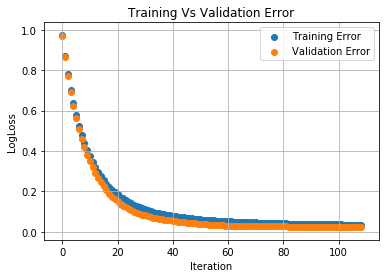

In [32]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['mlogloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['mlogloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

## Plot the Importance to the Model

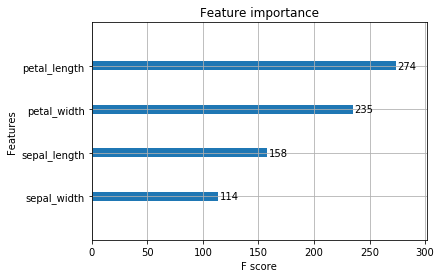

In [33]:
xgb.plot_importance(classifier)
plt.show()

In [34]:
df = pd.read_csv(validation_file,names=columns)

In [35]:
df.head() # data check

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,0,4.6,3.1,1.5,0.2
1,1,6.1,2.9,4.7,1.4
2,2,6.5,3.0,5.2,2.0
3,1,5.0,2.0,3.5,1.0
4,0,5.0,3.6,1.4,0.2


In [36]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   sepal_length  sepal_width  petal_length  petal_width
0           4.6          3.1           1.5          0.2
1           6.1          2.9           4.7          1.4
2           6.5          3.0           5.2          2.0
3           5.0          2.0           3.5          1.0
4           5.0          3.6           1.4          0.2


In [37]:
result = classifier.predict(X_test)

In [38]:
result[:5]

array([0, 1, 2, 1, 0])

In [39]:
df['predicted_class'] = result #le.inverse_transform(result)

In [40]:
df.head() #data check

,encoded_class,sepal_length,sepal_width,petal_length,petal_width,predicted_class
0,0,4.6,3.1,1.5,0.2,0
1,1,6.1,2.9,4.7,1.4,1
2,2,6.5,3.0,5.2,2.0,2
3,1,5.0,2.0,3.5,1.0,1
4,0,5.0,3.6,1.4,0.2,0


## Compare the Actual to Model 1 Prediction

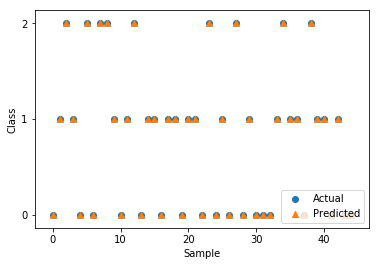

In [41]:
# Compare performance of Actual and Model 1 Prediction
plt.figure()
plt.scatter(df.index,df['encoded_class'],label='Actual')
plt.scatter(df.index,df['predicted_class'],label='Predicted',marker='^')
plt.legend(loc=4)
plt.yticks([0,1,2])
plt.xlabel('Sample')
plt.ylabel('Class')
plt.show()

## Create the Confusion Matrix
Confusion Matrix is a table that summarizes performance of classification models.

In [42]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['encoded_class'],
                              df['predicted_class'],labels=labels)

In [44]:
cnf_matrix # data check

array([[18,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]])

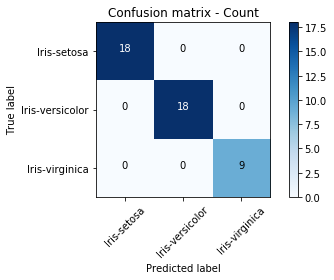

In [45]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix - Count')

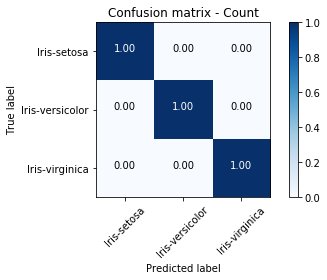

In [46]:
# Plot confusion matrix - normalized
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix - Count',normalize=True)

## Print Classification Report

In [47]:
print(classification_report(
    df['encoded_class'],
    df['predicted_class'],
    labels=labels,
    target_names=classes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00         9

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

